In [120]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import warnings
warnings.filterwarnings("ignore")
from autoviz.AutoViz_Class import AutoViz_Class
#Instantiate the AutoViz class
AV = AutoViz_Class()
import re
from matplotlib import pyplot as plt 

In [2]:
data = pd.read_csv('covid19_tweets.csv')

In [15]:
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",False


In [4]:
data.drop('source',axis=1,inplace=True)

In [121]:
data.isnull().sum()

user_name               0
user_location       36771
user_description    10286
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            51334
is_retweet              0
dtype: int64

In [16]:
data.user_location.value_counts()

India                       3741
United States               2455
New Delhi, India            1721
Mumbai, India               1401
Washington, DC              1354
                            ... 
Nigeria 🇳🇬                     1
XII Region de Magallanes       1
The Death Star                 1
Woodcliff Lake, NJ             1
Wherever I Roam                1
Name: user_location, Length: 26920, dtype: int64

In [132]:
locations =   data['user_location'].value_counts().to_frame()
locations = locations.reset_index()


In [95]:
locations['index'] = locations['index'].apply(lambda x: re.sub(r'[.|;|/]','',x))


In [133]:
indiaplaces = ["andhra pradesh","arunachal pradesh","assam","bihar","chhattisgarh","goa","new delhi","gujarat","delhi","haryana","himachal pradesh","jharkhand","karnataka","kerala","jammu and kashmir","madhya pradesh","maharashtra","manipur","meghalaya","mizoram","nagaland","odisha","punjab","rajasthan","sikkim","tamil nadu","telangana ","tripura","uttarakhand","uttar pradesh ","west bengal","hyderabad","itanagar","dispur","patna","raipur","panaji","gandhinagar","chandigarh","shimla","ranchi","bangalore","bengaluru","thiruvananthapuram","bhopal","mumbai","imphal","shillong","aizawl","kohima","bhubaneswar","chandigarh","jaipur","gangtok","chennai","hyderabad","agartala","gairsain","lucknow","kolkata","pune","srinagar"]

usplaces =["alabama","alaska","arizona","arkansas","california","colorado","connecticut","delaware","florida","georgia","hawaii","idaho","illinois","indiana","iowa","kansas","kentucky","louisiana","maine","maryland","massachusetts","michigan","minnesota","mississippi","missouri","montana","nebraska","nevada","new hampshire","new jersey","new mexico","new york","north carolina","north dakota","ohio","oklahoma","oregon","pennsylvania","rhode island","south carolina","south dakota","tennessee","texas","utah","vermont","virginia","washington","west virginia","wisconsin","wyoming","al","ak","az","ar","ca","co","ct","de","fl","ga","hi","id","il","in","ia","ks","ky","la","me","md","ma","mi","mn","ms","mo","mt","ne","nv","nh","nj","nm","ny","nc","nd","oh","ok","or","pa","ri","sc","sd","tn","tx","ut","vt","va","wa","wv","wi","wy","montgomery","juneau","phoenix","little rock","sacramento","denver","hartford","dover","tallahassee","atlanta","honolulu","boise","springfield","indianapolis","des moines","topeka","frankfort","baton rouge","augusta","annapolis","boston","lansing","st. paul","jackson","jefferson city","helena","lincoln","carson city","concord","trenton","santa fe","albany","raleigh","bismarck","columbus","oklahoma city","salem","harrisburg","providence","columbia","pierre","nashville","austin","salt lake city","montpelier","richmond","olympia","charleston","madison","cheyenne","united states"]


In [134]:
locations['country']=''
for i in range(0,len(locations)):
    
    split = locations.loc[i,'index'].split(',')
    if(len(split) > 1):
        if(split[1].lstrip().rstrip().lower() in indiaplaces):
            locations.loc[i,'country'] = "india"
        elif(split[1].lstrip().rstrip().lower() in usplaces):
            locations.loc[i,'country'] = "usa"
        elif(split[1].lstrip().rstrip().lower() == "united kingdom"):
            locations.loc[i,'country'] = "uk"
        elif(split[1].lstrip().rstrip().lower() == "us"):
            locations.loc[i,'country'] = "usa"
        else:
            locations.loc[i,'country'] = split[1].lstrip().rstrip().lower()
    else:
        if(split[0].lstrip().rstrip().lower() in indiaplaces):
            locations.loc[i,'country'] = "india"
        elif(split[0].lstrip().rstrip().lower() in usplaces):
            locations.loc[i,'country'] = "usa"
        elif(split[0].lstrip().rstrip().lower() == "united kingdom"):
            locations.loc[i,'country'] = "uk"
        elif(split[0].lstrip().rstrip().lower() == "us"):
            locations.loc[i,'country'] = "usa"
        else:
            locations.loc[i,'country'] = split[0].lstrip().rstrip().lower()


In [141]:
d = locations.groupby('country',as_index = False)['user_location'].sum()

In [142]:
d

,country,user_location
0,,78
1,!!rose hill!!,1
2,"""backend of the cow"" (fl)",1
3,"""great state of nj""",1
4,"""lots of different places.""",1
...,...,...
15308,🦄,1
15309,🦄🌈❤️🧡💛💚💙💜🌈🦄,3
15310,🦅💛💛💙❤🌋,1
15311,🦠grounded,1


In [143]:
d = d.sort_values('user_location',ascending =0).reset_index().iloc[1:11]

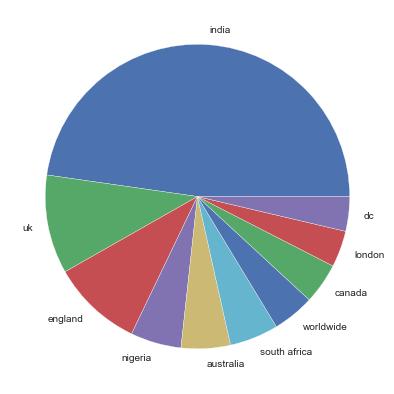

In [144]:


fig = plt.figure(figsize =(10, 7)) 
plt.pie(d['user_location'], labels = d['country']) 
  
# show plot 
plt.show() 

In [140]:
locations.to_excel('CovidTweetLocations.xlsx')

In [ ]:
data['country'] = 